In [36]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

EXIBINDO A IMAGEM ORIGINAL E NA COR CINZA

In [ ]:
imagem_original = cv2.imread('..\images\coins-fundo.png')
imagem_cinza = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\joaov\AppData\Local\Temp\ipykernel_16196\3943716456.py:1: SyntaxWarning: invalid escape sequence '\i'
  imagem_original = cv2.imread('..\images\coins-fundo.png')


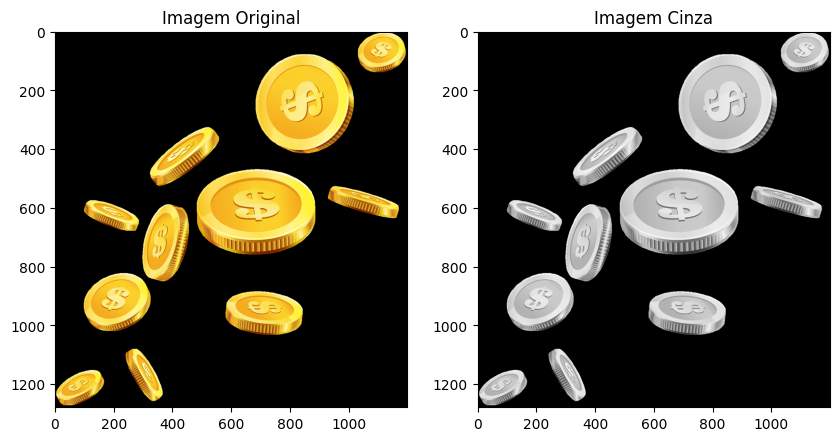

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)), plt.title("Imagem Original")
plt.subplot(1,2,2), plt.imshow(imagem_cinza, cmap='gray'), plt.title("Imagem Cinza")
plt.show()


APLICANDO LIMIARIZAÇÃO

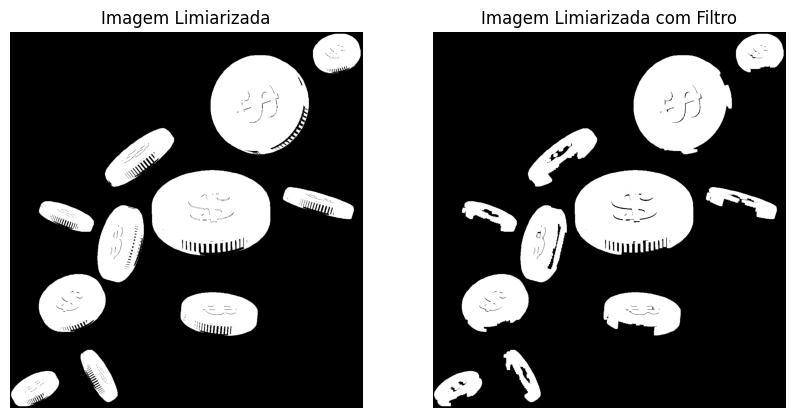

In [39]:
_, imagem_bin = cv2.threshold(imagem_cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((9,9), np.uint8)
imagem_bin_filtro = cv2.morphologyEx(imagem_bin, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_bin, cmap='gray')
plt.title('Imagem Limiarizada')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagem_bin_filtro, cmap='gray')
plt.title('Imagem Limiarizada com Filtro')
plt.axis('off')
plt.show()

    

Detectar e Desenhar Contornos

Número de objetos detectados: 11


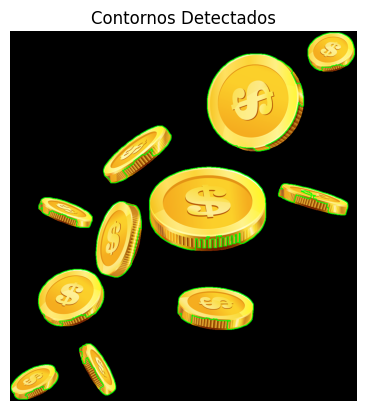

In [40]:
contornos, _ = cv2.findContours(imagem_bin_filtro, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

num_objetos = len(contornos)
print(f"Número de objetos detectados: {num_objetos}") 


imagem_contornos = imagem_original.copy()
cv2.drawContours(imagem_contornos, contornos, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(imagem_contornos, cv2.COLOR_BGR2RGB))
plt.title("Contornos Detectados")
plt.axis('off')
plt.show()

RESPOSTAS

01- Qual a função da limiarização automática em uma imagem?
A limiarização automática separa os objetos do fundo sem necessidade de definir um valor fixo de limiar manualmente, tornando o processo mais eficiente e preciso.

02- Qual a diferença entre limiarização simples e limiarização por Otsu?
A simples usa um valor fixo escolhido manualmente, enquanto o método de Otsu calcula automaticamente o melhor limiar com base na distribuição dos pixels.

03- Qual é o papel da função cv2.findContours() no processo de segmentação?
A função cv2.findContours() identifica os contornos dos objetos em uma imagem binarizada. Ela transforma a imagem processada em uma lista de coordenadas que representam as bordas dos objetos, permitindo que possamos contá-los, desenhá-los e manipulá-los. Esse processo é essencial para a análise de formas e para a segmentação de diferentes elementos dentro da imagem.

04- Qual foi o número de objetos detectados na imagem?
11

05- Quais são as vantagens da segmentação por cor no espaço de cores HSV?
O espaço de cores HSV (Hue, Saturation, Value) é mais eficiente para segmentação porque separa a cor (H) da intensidade de luz (V), o que torna a detecção mais robusta contra variações de iluminação. Algumas vantagens são: Independência da iluminação; Facilidade na filtragem por cor; Melhor distinção entre tons parecidos;
